In [13]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import os
import random
import warnings
import json
from lib import *
from gnnboundary import *

warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
seeds = [42, 43, 44, 45, 46]

# MRSC9

In [3]:
dataset_name="mrsc9"
dataset = MSRCDataset(seed=12345)
model = MultiGCNClassifier(node_features=len(dataset.NODE_CLS),
                             num_classes=len(dataset.GRAPH_CLS),
                             hidden_channels=16,
                             num_layers=5)
model.load_state_dict(torch.load('ckpts/msrc_9.pt'))
dataset_list_gt = dataset.split_by_class()
dataset_list_pred = dataset.split_by_pred(model)
mean_embeds = [d.model_transform(model, key="embeds").mean(dim=0) for d in dataset_list_gt]

Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


## adjacenct classes

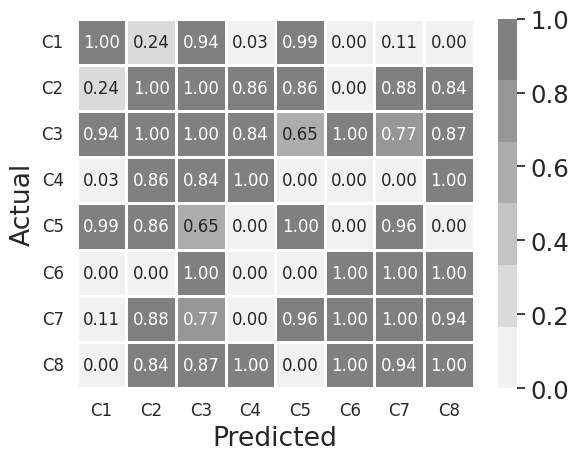

In [4]:
from lib.helpers import draw_matrix_colorless

adj_ratio_mat, boundary_info = pairwise_boundary_analysis(model, dataset_list_pred)
draw_matrix_colorless(adj_ratio_mat, names=dataset.GRAPH_CLS.values(), fmt='.2f', labelsize=12, annotsize=12)

In [7]:
adjacent_classes = extract_adjacent_classes(adj_ratio_mat, threshold=0.8)
# adjacent_classes = adjacent_classes[0:6]
print(adjacent_classes)
print(len(adjacent_classes))

[[1, 4], [4, 6], [1, 7], [2, 3], [1, 2], [3, 7], [6, 7], [0, 2], [2, 7], [2, 5], [0, 4], [5, 6], [1, 6], [1, 3], [5, 7]]
15


## results

In [8]:
results = get_results_2way(model=model, adjacent_classes=adjacent_classes, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 44


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip
Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 45


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip
Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 46


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip
Processing...
Done!


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [11]:
results_formatted = dict()
for k, v in results.items():
    results_formatted[f"{k[0]},{k[1]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}.json", 'w', encoding='utf-8') as f: 
    json.dump(results_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}.json", 'r') as f:
    loaded = json.load(f)

results = dict()
for k,v in loaded.items():
    results[(k[0],k[2])] = np.array(v)

In [14]:
for k, v in results.items():
    print(f"c1 = {k[0]} c2 = {k[1]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]}')
    print(f'baseline: c1_mean = {v[4]} c1_std = {v[5]} c2_mean = {v[6]} c2_std = {v[7]}')

c1 = 4 c2 = 6
gnnboundary: c1_mean = 0.49733915002018914 c1_std = 0.082835084118872 c2_mean = 0.49955419733524326 c2_std = 0.08295924079570524
baseline: c1_mean = 5.931085866382651e-05 c1_std = 0.0009492294787424513 c2_mean = 0.16548685191982768 c2_std = 0.3485848783201824
c1 = 3 c2 = 7
gnnboundary: c1_mean = 1.0 c1_std = 0.0 c2_mean = 3.410063458626235e-09 c2_std = 7.937786679653843e-10
baseline: c1_mean = 0.05617581496257077 c1_std = 0.20604425202262944 c2_mean = 0.645386768210663 c2_std = 0.43387760937629016
c1 = 1 c2 = 2
gnnboundary: c1_mean = 0.5015455972462892 c1_std = 0.08743965246086957 c2_mean = 0.47303566267415875 c2_std = 0.09429070786357793
baseline: c1_mean = 0.013854530094440341 c1_std = 0.09393760630329834 c2_mean = 0.036775477381892754 c2_std = 0.15965236742865066
c1 = 6 c2 = 7
gnnboundary: c1_mean = 0.46994919197315177 c1_std = 0.14552568975270316 c2_mean = 0.4833744026148692 c2_std = 0.1267718509352996
baseline: c1_mean = 0.16457004813758938 c1_std = 0.343701052435776

## 3way adjacent classes

In [15]:
adj_tensor, results = triplet_boundary_analysis(model, dataset_list_pred)
adjacent_triplets = find_top_triplets(adj_tensor, threshold=0.9)

Classes (5, 6, 7): Score 1.000 Classes (0, 2, 4): Score 0.980 Classes (3, 5, 7): Score 0.970 Classes (1, 2, 3): Score 0.960 Classes (1, 2, 7): Score 0.960 Classes (1, 2, 6): Score 0.930 Classes (2, 3, 7): Score 0.930 Classes (2, 5, 7): Score 0.920


In [16]:
adjacent_triplets_list = []
for triplet in adjacent_triplets:
    adjacent_triplets_list.append(list(triplet["classes"])) 

print(adjacent_triplets_list)

[[5, 6, 7], [0, 2, 4], [3, 5, 7], [1, 2, 3], [1, 2, 7], [1, 2, 6], [2, 3, 7], [2, 5, 7]]


## 3way results

In [ ]:
results_3way = get_results_3way(model=model, adjacent_classes=adjacent_triplets_list, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 44


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 45


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 46


Using existing file MSRC_9.zip
Extracting data/MSRC_9/raw/MSRC_9.zip


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
results_3way_formatted = dict()
for k, v in results_3way.items():
    results_3way_formatted[f"{k[0]},{k[1]},{k[2]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}_3way.json", 'w', encoding='utf-8') as f: 
    json.dump(results_3way_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}_3way.json", 'r') as f:
    loaded_3way = json.load(f)

results_3way = dict()
for k,v in loaded_3way.items():
    results_3way[(k[0],k[2],k[4])] = np.array(v)

In [58]:
for k, v in results_3way.items():
    print(f"c1 = {k[0]} c2 = {k[1]} c3 = {k[2]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]} c3_mean = {v[4]} c3_std = {v[5]}')
    print(f'baseline: c1_mean = {v[6]} c1_std = {v[7]} c2_mean = {v[8]} c2_std = {v[9]} c3_mean = {v[10]} c3_std = {v[11]}')
    print(f"convergence rate = {v[12]}")

c1 = 5 c2 = 6 c3 = 7
gnnboundary: c1_mean = 0.36756072252467276 c1_std = 0.08231916304583241 c2_mean = 0.33302114897356366 c2_std = 0.09979059805902425 c3_mean = 0.29934373101927336 c3_std = 0.084837737760561
baseline: c1_mean = 0.08341822990330273 c1_std = 0.23625953116156323 c2_mean = 0.16637356873874246 c2_std = 0.3482955325084661 c3_mean = 0.6405488650402185 c3_std = 0.43877587409924346
convergence rate = 1.0
c1 = 0 c2 = 2 c3 = 4
gnnboundary: c1_mean = 0.19813641012832525 c1_std = 0.05680391144280142 c2_mean = 0.6135374412208795 c2_std = 0.027283794543641205 c3_mean = 0.1836404874846339 c3_std = 0.04857221867926496
baseline: c1_mean = 3.688301447411262e-15 c1_std = 7.306213194134544e-14 c2_mean = 0.03778544353650614 c2_std = 0.16610873222791767 c3_mean = 0.0006571905169028937 c3_std = 0.010475637583333662
convergence rate = 0.4
c1 = 3 c2 = 5 c3 = 7
gnnboundary: c1_mean = 0.32480050903484226 c1_std = 0.054472221332140476 c2_mean = 0.006226647393938038 c2_std = 0.002602316160069397 c

# Collab

In [59]:
dataset_name="collab"
dataset = CollabDataset(seed=12345)
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=64,
                      num_layers=5)
model.load_state_dict(torch.load('ckpts/collab.pt'))
dataset_list_gt = dataset.split_by_class()
dataset_list_pred = dataset.split_by_pred(model)
mean_embeds = [d.model_transform(model, key="embeds").mean(dim=0) for d in dataset_list_gt]

## adjacent classes

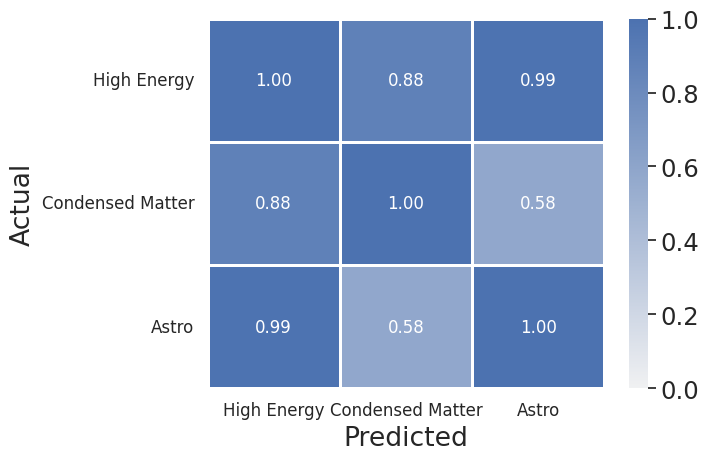

In [60]:
adj_ratio_mat, boundary_info = pairwise_boundary_analysis(model, dataset_list_pred)
draw_matrix(adj_ratio_mat, names=dataset.GRAPH_CLS.values(), fmt='.2f', labelsize=12, annotsize=12)

In [61]:
adjacent_classes = extract_adjacent_classes(adj_ratio_mat, threshold=0.8)
print(adjacent_classes)

[[0, 1], [0, 2]]


## get results

In [ ]:
results = get_results_2way(model=model, adjacent_classes=adjacent_classes, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


Processing...


In [ ]:
results_formatted = dict()
for k, v in results.items():
    results_formatted[f"{k[0]},{k[1]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}.json", 'w', encoding='utf-8') as f: 
    json.dump(results_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}.json", 'r') as f:
    loaded = json.load(f)

results = dict()
for k,v in loaded.items():
    results[(k[0],k[2])] = np.array(v)

In [ ]:
for k, v in results.items():
    print(f"c1 = {k[0]} c2 = {k[1]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]}')
    print(f'baseline: c1_mean = {v[4]} c1_std = {v[5]} c2_mean = {v[6]} c2_std = {v[7]}')

## 3way adjacent classes

In [ ]:
adj_tensor, results = triplet_boundary_analysis(model, dataset_list_pred)
adjacent_triplets = find_top_triplets(adj_tensor, threshold=0.9)

In [ ]:
adjacent_triplets_list = []
for triplet in adjacent_triplets:
    adjacent_triplets_list.append(list(triplet["classes"])) 

print(adjacent_triplets_list)

## 3way results

In [ ]:
results_3way = get_results_3way(model=model, adjacent_classes=adjacent_triplets_list, dataset_name=dataset_name, seeds=seeds, show_progress=True)

In [ ]:
results_3way_formatted = dict()
for k, v in results_3way.items():
    results_3way_formatted[f"{k[0]},{k[1]},{k[2]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}_3way.json", 'w', encoding='utf-8') as f: 
    json.dump(results_3way_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}_3way.json", 'r') as f:
    loaded_3way = json.load(f)

results_3way = dict()
for k,v in loaded_3way.items():
    results_3way[(k[0],k[2],k[4])] = np.array(v)

In [ ]:
for k, v in results_3way.items():
    print(f"c1 = {k[0]} c2 = {k[1]} c3 = {k[2]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]} c3_mean = {v[4]} c3_std = {v[5]}')
    print(f'baseline: c1_mean = {v[6]} c1_std = {v[7]} c2_mean = {v[8]} c2_std = {v[9]} c3_mean = {v[10]} c3_std = {v[11]}')
    print(f"convergence rate = {v[12]}")

# Enzymes

In [ ]:
dataset_name="enzymes"
dataset = ENZYMESDataset(seed=12345)
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=32,
                      num_layers=3)
model.load_state_dict(torch.load('ckpts/enzymes.pt'))
dataset_list_gt = dataset.split_by_class()
dataset_list_pred = dataset.split_by_pred(model)
mean_embeds = [d.model_transform(model, key="embeds").mean(dim=0) for d in dataset_list_gt]

## adjacency matrix

In [ ]:
adj_ratio_mat, boundary_info = pairwise_boundary_analysis(model, dataset_list_pred)
draw_matrix(adj_ratio_mat, names=dataset.GRAPH_CLS.values(), fmt='.2f', labelsize=12, annotsize=12)

In [ ]:
adjacent_classes = extract_adjacent_classes(adj_ratio_mat, threshold=0.8)
print(adjacent_classes)

## get results

In [ ]:
results = get_results_2way(model=model, adjacent_classes=adjacent_classes, dataset_name=dataset_name, seeds=seeds, show_progress=True)

In [ ]:
results_formatted = dict()
for k, v in results.items():
    results_formatted[f"{k[0]},{k[1]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}.json", 'w', encoding='utf-8') as f: 
    json.dump(results_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}.json", 'r') as f:
    loaded = json.load(f)

results = dict()
for k,v in loaded.items():
    results[(k[0],k[2])] = np.array(v)

In [ ]:
for k, v in results.items():
    print(f"c1 = {k[0]} c2 = {k[1]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]}')
    print(f'baseline: c1_mean = {v[4]} c1_std = {v[5]} c2_mean = {v[6]} c2_std = {v[7]}')

## 3way adjacent classes

In [ ]:
adj_tensor, results = triplet_boundary_analysis(model, dataset_list_pred)
adjacent_triplets = find_top_triplets(adj_tensor, threshold=0.9)

In [ ]:
adjacent_triplets_list = []
for triplet in adjacent_triplets:
    adjacent_triplets_list.append(list(triplet["classes"])) 

print(adjacent_triplets_list)

## 3way results

In [ ]:
results_3way = get_results_3way(model=model, adjacent_classes=adjacent_triplets_list, dataset_name=dataset_name, seeds=seeds, show_progress=True)

In [ ]:
results_3way_formatted = dict()
for k, v in results_3way.items():
    results_3way_formatted[f"{k[0]},{k[1]},{k[2]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}_3way.json", 'w', encoding='utf-8') as f: 
    json.dump(results_3way_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}_3way.json", 'r') as f:
    loaded_3way = json.load(f)

results_3way = dict()
for k,v in loaded_3way.items():
    results_3way[(k[0],k[2],k[4])] = np.array(v)

In [ ]:
for k, v in results_3way.items():
    print(f"c1 = {k[0]} c2 = {k[1]} c3 = {k[2]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]} c3_mean = {v[4]} c3_std = {v[5]}')
    print(f'baseline: c1_mean = {v[6]} c1_std = {v[7]} c2_mean = {v[8]} c2_std = {v[9]} c3_mean = {v[10]} c3_std = {v[11]}')
    print(f"convergence rate = {v[12]}")

# Motif

In [16]:
dataset_name="motif"
dataset = MotifDataset(seed=12345)
model = GCNClassifier(node_features=len(dataset.NODE_CLS),
                      num_classes=len(dataset.GRAPH_CLS),
                      hidden_channels=6,
                      num_layers=3)
model.load_state_dict(torch.load('ckpts/motif.pt'))
dataset_list_gt = dataset.split_by_class()
dataset_list_pred = dataset.split_by_pred(model)
mean_embeds = [d.model_transform(model, key="embeds").mean(dim=0) for d in dataset_list_gt]

## adjacent classes

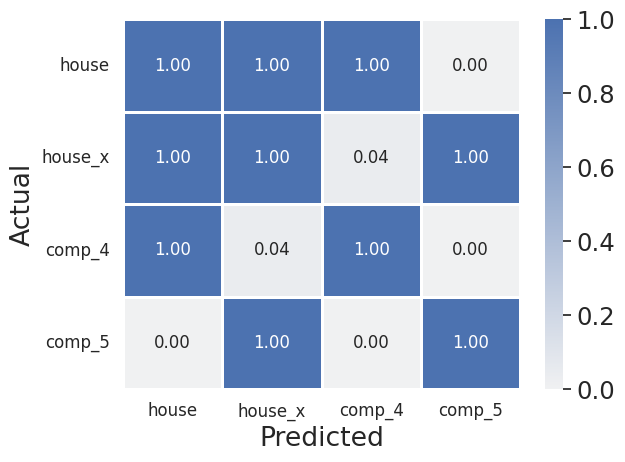

In [4]:
adj_ratio_mat, boundary_info = pairwise_boundary_analysis(model, dataset_list_pred)
draw_matrix(adj_ratio_mat, names=dataset.GRAPH_CLS.values(), fmt='.2f', labelsize=12, annotsize=12)

In [5]:
adjacent_classes = extract_adjacent_classes(adj_ratio_mat, threshold=0.8)
print(adjacent_classes)

[[0, 1], [0, 2], [1, 3]]


## get results

In [6]:
results = get_results_2way(model=model, adjacent_classes=adjacent_classes, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42
using seed 43
using seed 44
using seed 45
using seed 46


In [8]:
results_formatted = dict()
for k, v in results.items():
    results_formatted[f"{k[0]},{k[1]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}.json", 'w', encoding='utf-8') as f: 
    json.dump(results_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}.json", 'r') as f:
    loaded = json.load(f)

results = dict()
for k,v in loaded.items():
    results[(k[0],k[2])] = np.array(v)

In [9]:
for k, v in results.items():
    print(f"c1 = {k[0]} c2 = {k[1]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]}')
    print(f'baseline: c1_mean = {v[4]} c1_std = {v[5]} c2_mean = {v[6]} c2_std = {v[7]}')

c1 = 0 c2 = 1
gnnboundary: c1_mean = 0.500856267915928 c1_std = 0.1651950462303402 c2_mean = 0.49790768722398204 c2_std = 0.16731927746959857
baseline: c1_mean = 0.7535550972908736 c1_std = 0.1493887981132927 c2_mean = 0.004452156612712133 c2_std = 0.01751561505208842
c1 = 0 c2 = 2
gnnboundary: c1_mean = 0.47649938561320304 c1_std = 0.05424783368869222 c2_mean = 0.522902509009838 c2_std = 0.054434780049904284
baseline: c1_mean = 0.7558131397202611 c1_std = 0.15088641848013012 c2_mean = 0.23972913449820177 c2_std = 0.15258156018448377
c1 = 1 c2 = 3
gnnboundary: c1_mean = 0.24247179028421928 c1_std = 0.054962440080945404 c2_mean = 0.3250777541598791 c2_std = 0.03317454808571049
baseline: c1_mean = 0.0034664536484974176 c1_std = 0.0034801980963396935 c2_mean = 2.998134929708713e-09 c2_std = 4.845143962002059e-09


## 3way adjacent classes

In [10]:
adj_tensor, results = triplet_boundary_analysis(model, dataset_list_pred)
adjacent_triplets = find_top_triplets(adj_tensor, threshold=0.9)

Classes (0, 1, 2): Score 1.000 Classes (0, 1, 3): Score 1.000


In [11]:
adjacent_triplets_list = []
for triplet in adjacent_triplets:
    adjacent_triplets_list.append(list(triplet["classes"])) 

print(adjacent_triplets_list)

[[0, 1, 2], [0, 1, 3]]


## 3way results

In [ ]:
results_3way = get_results_3way(model=model, adjacent_classes=adjacent_triplets_list, dataset_name=dataset_name, seeds=seeds, show_progress=True)

using seed 42


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

using seed 43


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
results_3way_formatted = dict()
for k, v in results_3way.items():
    results_3way_formatted[f"{k[0]},{k[1]},{k[2]}"] = v.tolist()

# saves results to file
with open(f"logs/{dataset_name}_3way.json", 'w', encoding='utf-8') as f: 
    json.dump(results_3way_formatted, f, ensure_ascii=False, indent=4)

# load results from file
with open(f"logs/{dataset_name}_3way.json", 'r') as f:
    loaded_3way = json.load(f)

results_3way = dict()
for k,v in loaded_3way.items():
    results_3way[(k[0],k[2],k[4])] = np.array(v)

In [ ]:
for k, v in results_3way.items():
    print(f"c1 = {k[0]} c2 = {k[1]} c3 = {k[2]}")
    print(f'gnnboundary: c1_mean = {v[0]} c1_std = {v[1]} c2_mean = {v[2]} c2_std = {v[3]} c3_mean = {v[4]} c3_std = {v[5]}')
    print(f'baseline: c1_mean = {v[6]} c1_std = {v[7]} c2_mean = {v[8]} c2_std = {v[9]} c3_mean = {v[10]} c3_std = {v[11]}')
    print(f"convergence rate = {v[12]}")